In [1]:
#data_file_path="/home/jovyan/work/finance_complaint/finance_artifact/data_ingestion/feature_store/finance_complaint"
import pandas as pd
import numpy as np
import seaborn as sns # For Data Visualization
import matplotlib.pyplot as plt # For Data Visualization

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#df = spark_session.read.parquet(data_file_path)
data=pd.read_csv("/content/drive/MyDrive/finance_complaint/consumer_complaints.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
data.dtypes,data.shape

(date_received                   object
 product                         object
 sub_product                     object
 issue                           object
 sub_issue                       object
 consumer_complaint_narrative    object
 company_public_response         object
 company                         object
 state                           object
 zipcode                         object
 tags                            object
 consumer_consent_provided       object
 submitted_via                   object
 date_sent_to_company            object
 company_response_to_consumer    object
 timely_response                 object
 consumer_disputed?              object
 complaint_id                     int64
 dtype: object, (555957, 18))

In [ ]:
#from pyspark.sql.functions import col

In [24]:
data.head(5)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [9]:
#len(data['issue'].unique())
data.isnull().mean()*100


date_received                    0.000000
product                          0.000000
sub_product                     28.477382
issue                            0.000000
sub_issue                       61.755675
consumer_complaint_narrative    87.983603
company_public_response         84.688744
company                          0.000000
state                            0.879025
zipcode                          0.810314
tags                            85.977513
consumer_consent_provided       77.793606
submitted_via                    0.000000
date_sent_to_company             0.000000
company_response_to_consumer     0.000000
timely_response                  0.000000
consumer_disputed?               0.000000
complaint_id                     0.000000
dtype: float64

In [18]:
## Check how much % is missing in each feature
def perform_null_analysis(df):   
    missing_data_percentage=data.isnull().mean()*100
    print(missing_data_percentage[missing_data_percentage>0].sort_values(ascending=False))
    return missing_data_percentage[missing_data_percentage>0].sort_values(ascending=False).index

In [19]:
missing_features = perform_null_analysis(data)

consumer_complaint_narrative    87.983603
tags                            85.977513
company_public_response         84.688744
consumer_consent_provided       77.793606
sub_issue                       61.755675
sub_product                     28.477382
state                            0.879025
zipcode                          0.810314
dtype: float64


In [23]:
missing=data[missing_features].sample(3)
missing

,consumer_complaint_narrative,tags,company_public_response,consumer_consent_provided,sub_issue,sub_product,state,zipcode
307792,NaN,NaN,Company chooses not to provide a public response,NaN,Account status,NaN,PA,19085
511290,NaN,NaN,NaN,NaN,NaN,NaN,NY,10708
73584,NaN,NaN,NaN,NaN,NaN,Other mortgage,VA,24015


In [26]:
data[data['consumer_complaint_narrative'].isnull()==False].head(3)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
190126,03/19/2015,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,XXXX has claimed I owe them {$27.00} for XXXX ...,NaN,"Diversified Consultants, Inc.",NY,121XX,Older American,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290516
190135,03/19/2015,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,Due to inconsistencies in the amount owed that...,NaN,M&T Bank Corporation,VA,221XX,Servicemember,Consent provided,Web,03/19/2015,Closed with explanation,Yes,No,1290492
190155,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,In XX/XX/XXXX my wages that I earned at my job...,NaN,Wells Fargo & Company,CA,946XX,NaN,Consent provided,Web,03/19/2015,Closed with explanation,Yes,Yes,1290524


In [27]:
def processing():
    data_copy = data.copy()
    
    # State
    data_copy.state.fillna(data_copy.state.mode()[0],inplace=True)    
    # Zipcode
    data_copy.zipcode.fillna(data_copy.zipcode.mode()[0],inplace=True)    
    # sub_product (no sub_product, product is already self-sufficient)
    data_copy.sub_product.fillna("None", inplace=True)
    
    # sub_issue (no sub_issue, issue is already self-sufficient)
    data_copy.sub_issue.fillna("None", inplace=True)
    
    # consumer_consent_provided  (unknown consent)
    data_copy.consumer_consent_provided.fillna("missing", inplace=True)
    
    # company_public_response  (did not provide one)
    data_copy.company_public_response.fillna("None", inplace=True)
    
    # tags  
    data_copy.drop("tags",axis=1,inplace=True)
    
    # consumer_complaint_narrative  (no complaint narratives provided)
    data_copy.consumer_complaint_narrative.fillna("None", inplace=True)
    
    return data_copy

In [28]:
dataCopy = processing()

In [29]:
dataCopy.head(3)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",None,None,None,U.S. Bancorp,CA,95993,missing,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",None,None,None,Wells Fargo & Company,CA,91104,missing,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,None,Incorrect information on credit report,Account status,None,None,Wells Fargo & Company,NY,11764,missing,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473


In [52]:
dataCopy['issue'].value_counts()[:5]

Loan modification,collection,foreclosure    97191
Incorrect information on credit report      66718
Loan servicing, payments, escrow account    60375
Cont'd attempts collect debt not owed       42285
Account opening, closing, or management     26661
Name: issue, dtype: int64

***Top 10 issues***

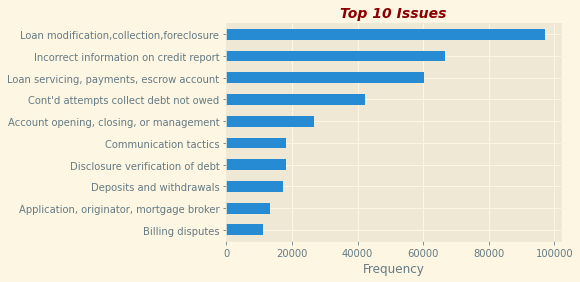

In [39]:

with plt.style.context("Solarize_Light2"):
  dataCopy['issue'].value_counts()[:10].sort_values().plot(kind='barh')
  plt.title("Top 10 Issues",fontdict={'family': 'Arial',
                                       'color':  'darkred',
                                       'weight': 'bold',
                                       'size': 14,
                                       "style":"italic"})
  plt.xlabel("Frequency")

**Top 10 Company with highest complaints**

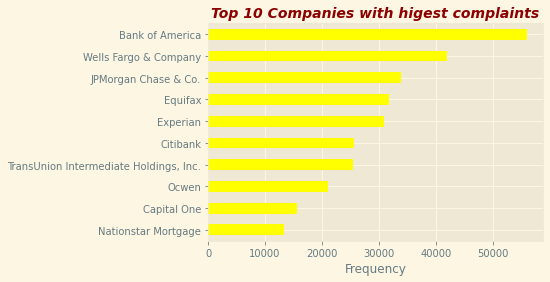

In [40]:
with plt.style.context("Solarize_Light2"):
  dataCopy['company'].value_counts()[:10].sort_values().plot(kind='barh',color='yellow')
  plt.title("Top 10 Companies with higest complaints",fontdict={'family': 'Arial',
                                       'color':  'darkred',
                                       'weight': 'bold',
                                       'size': 14,
                                       "style":"italic"})
  plt.xlabel("Frequency")

**Top 10 Company with least complaints**

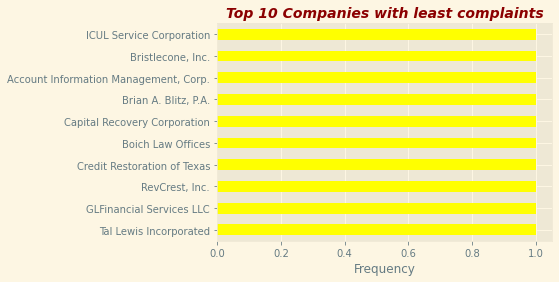

In [42]:
with plt.style.context("Solarize_Light2"):
  dataCopy['company'].value_counts()[-10:].sort_values().plot(kind='barh',color='yellow')
  plt.title("Top 10 Companies with least complaints",fontdict={'family': 'Arial',
                                       'color':  'darkred',
                                       'weight': 'bold',
                                       'size': 14,
                                       "style":"italic"})
  plt.xlabel("Frequency")

***Common issues associated wt top 10 companies with product***

In [58]:
# Extract the top 10 companies
top_companies = dataCopy.company.value_counts()[:10].sort_values().index.tolist()

affected_rows_index=[row for row,company in  enumerate(dataCopy.company) if company in top_companies]
#for row in enumerate(dataCopy['company']):
  #print(row)
df1=dataCopy.loc[affected_rows_index,['company','issue','product']]
df1.sample(4)


,company,issue,product
283786,Bank of America,Identity theft / Fraud / Embezzlement,Credit card
219534,Wells Fargo & Company,"Loan modification,collection,foreclosure",Mortgage
227545,Experian,Incorrect information on credit report,Credit reporting
139338,Experian,Unable to get credit report/credit score,Credit reporting


In [59]:
data.head(3)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473


***Top 10 States with Highest Complained Companies***

In [ ]:
data.he